**Student ID**: 208040148

# STATISTICAL METHODS IN EXPERIMENTAL PHYSICS 
Practice paper questions #2


## Problem 1
### 1.0 Data Import

In [2]:
# Library imports for plotting figures and numerical processing
import matplotlib.pyplot as plt 
import numpy as np

# Import file as array
data1 = np.loadtxt("data1.dat")

### 1.1 Histogram

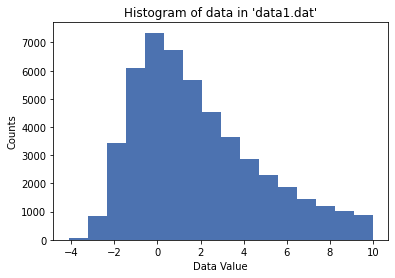

In [25]:
data1Min = np.min(data1)
data1Max = np.max(data1)
#nBins=int(np.sqrt(len(data1))) # discarded square root
nBins = int(1+np.log2(len(data1))) # Sturge's formula
#nBins = int(2*np.cbrt(len(data1))) # Rice rule
plt.xlabel("Data Value")
plt.ylabel("Counts")
plt.title("Histogram of data in 'data1.dat'")
#plt.style.use('seaborn-deep')
#myRange=[-10,50]
#plt.hist(students, bins =number_of_bins, range=myRange)
plt.hist(data1, bins =nBins)
plt.show()

**Discussion**: The distribution does not appear to be normally distributed, but rather a skewed distribution (right skewed, or positively skewed).

**Range**: The default range in the histogram seems to utilise the range of the data, as checked by determining the minimum and maximum values in the set. Therefore, it was left to be default range.

**Binning**: The bin width was left uniform to avoid possible ambiguity. The number of bins was determined with a subjective evaluation using the following rationale: The default of 10 was determined to be too low to sufficiently visually represent the distribution and the square root value gave a comb pattern with many alternate tall/short bars. Sturge's formula and Rice formula were then attempted, and Sturge's formula was ultimately used as it captured the major characteristics of the distribution visually without having too many bins distract the user.

**Mode from visual inspection**: appears to be roughly 0.


### 1.2 Mean
We're assuming that arithmetic mean is what's required.
Looking through the data, it appears that the significant figures is limited to 6 in the dataset, which is used for presentation of output results.

In [40]:
data1SigFig = 6
data1Mean = np.mean(data1)
print("Arithmetic Mean of the data1.dat distribution = ", f'{data1Mean:.{data1SigFig}}')


Arithmetic Mean of the data1.dat distribution =  1.87179


### 1.3 Variance

In [43]:
data1Variance = data1.var()
print("Variance of data1.dat =", f'{data1Variance:.{data1SigFig}}') 

Variance of data1.dat = 8.41695


### 1.4 Skew

In [44]:
from scipy.stats import skew # library package for skew calcs
data1Skew = skew(data1)
print("Skew of data1.dat =", f'{data1Skew:.{data1SigFig}}') 

Skew of data1.dat = 0.76838


**Observation**: As observed earlier in the histogram section, the data appeared to be right skewed or positive skewed. This is confirmed by the calculation here.


## Problem 2
### 2.0 Data Import

In [46]:
# Import file as array (2d in this case, upon exploration)
data2 = np.loadtxt("data2.dat",delimiter=",")

### 2.1 Histogram

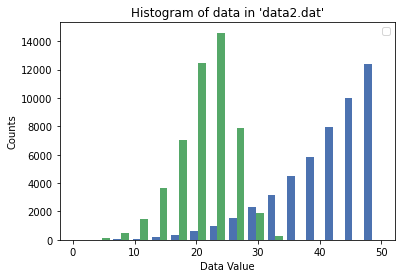

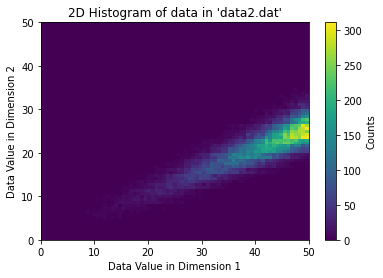

In [58]:
from math import floor


data2Min = np.min(data2)
data2Max = np.max(data2)
#nBins2=int(np.sqrt(len(data2))) # discarded square root
nBins2 = int(1+np.log2(len(data2))) # Sturge's formula
#nBins2 = int(2*np.cbrt(len(data2))) # Rice rule
myRange=[np.floor(data2Min/10)*10,np.ceil(data2Max/10)*10] # chosen based on the data observed and iterative refinements
plt.xlabel("Data Value")
plt.ylabel("Counts")
plt.title("Histogram of data in 'data2.dat'")
plt.legend(["Dimension 1","Dimension 2"])
plt.hist(data2, bins =nBins2, range=myRange)
plt.show()

# 2-D Histogram plot
plt.xlabel("Data Value in Dimension 1")
plt.ylabel("Data Value in Dimension 2")
plt.title("2D Histogram of data in 'data2.dat'")
nBins2D = int(2*np.cbrt(len(data2))) # Rice rule
plt.hist2d(data2[:,0],data2[:,1], bins =nBins2D, range=[myRange,myRange])
cbar = plt.colorbar()
cbar.set_label('Counts')
plt.show()

**Description**: By treating each column of data as separate series, it's possible to see that there are two distinct distributions.
The first series seems to have a strong left skew and appears to represent a different distribution compared to the second series as the right side does not tail off. The second seems appears to be a unimodal probability distribution with a negative skew or left skew.

**Choice of Histogram Range and Binning**: Given how there is overlap in the data of two dimensions, and a 2-D histogram can help understand the relation between the two dimensions of data, the range was modified from the default values. The range was first calculated including both dimensions, and rounded down to the nearest 10 and rounded up to the nearest 10 to neatly visualise the data. 

The choice of range was made to be the same for horizontal and vertical axes of the 2d histogram to ensure the data point representation remains as a square and not rectangles with unequal sides.

The bin width remained consistent to again avoid confusion and the number of bins was determined using Sturge's formula as it provided a good trade-off by captured the major characteristics of the distribution visually without having too many bins distract the user. However, for the 2D histogram, given the use of colour to represent the counts, a finer bin size was used (Rice's rule).

### 2.2 Mean
We're assuming that arithmetic mean is what's required.

Looking through the data, it appears that the significant figures is limited to 6 in the dataset, which is used for presentation of output results.

In [60]:
data2SigFig = 6
data2MeanD1 = np.mean(data2[:,0])
data2MeanD2 = np.mean(data2[:,1])
print("Arithmetic Mean of the 1st dimension distribution in data2.dat = ", f'{data2MeanD1:.{data2SigFig}}')
print("Arithmetic Mean of the 2nd dimension distribution in data2.dat = ", f'{data2MeanD2:.{data2SigFig}}')

Arithmetic Mean of the 1st dimension distribution in data2.dat =  40.8385
Arithmetic Mean of the 2nd dimension distribution in data2.dat =  21.3173


### 2.3 Variances

In [62]:
data2VarianceD1 = data2[:,0].var()
data2VarianceD2 = data2[:,1].var()
print("Variance of 1st dimension distribution in data1.dat =", f'{data2VarianceD1:.{data2SigFig}}') 
print("Variance of 2nd dimension distribution in data1.dat =", f'{data2VarianceD2:.{data2SigFig}}') 

Variance of 1st dimension distribution in data1.dat = 58.1154
Variance of 2nd dimension distribution in data1.dat = 20.4536


### 2.4 Covariance and Pearson coefficient